# Import des outils / jeu de données

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
np.random.seed(0)
sns.set_theme()

In [7]:
ID_COL = "PassengerId"
TARGET = "Survived"

In [8]:
df = pd.read_csv(
    "data/train.csv",
    index_col=ID_COL,
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 11 variables et 891 individus.


In [11]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [12]:
var_quanti = [
    "Age",
    "Fare",
]

In [45]:
var_quali = [
    "Pclass",
    "Sex",
    "SibSp",
    "Parch",
    "Cabin",
    "Embarked",
    TARGET,
]

#### Conversion de type

In [46]:
df[var_quali] = df[var_quali].astype(str).astype("category")  # todo: convertir uniquement les variables INT en category

In [ ]:
df = df.reset_index(drop=True)  # bug autrement

#### Variables

In [42]:
X = df.copy()
y = X.pop(TARGET)

In [15]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

# Analyse univariée

In [18]:
df[var_quanti].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [47]:
df[var_quali].describe()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Survived
count,891,891,891,891,891,891,891
unique,3,2,7,7,148,4,2
top,3,male,0,0,nan,S,0
freq,491,577,608,678,687,644,549


# Visualisation

## Variables quantitatives

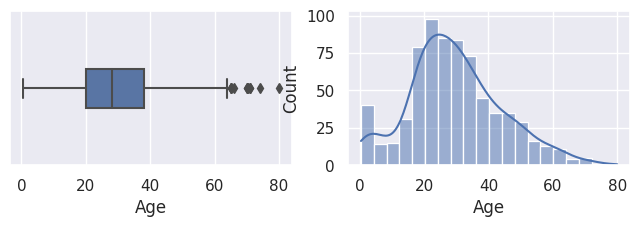

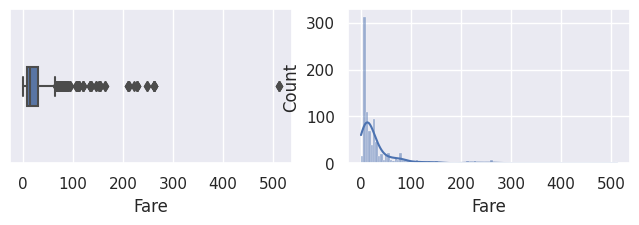

In [49]:
for var in var_quanti:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(x=df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

<Axes: >

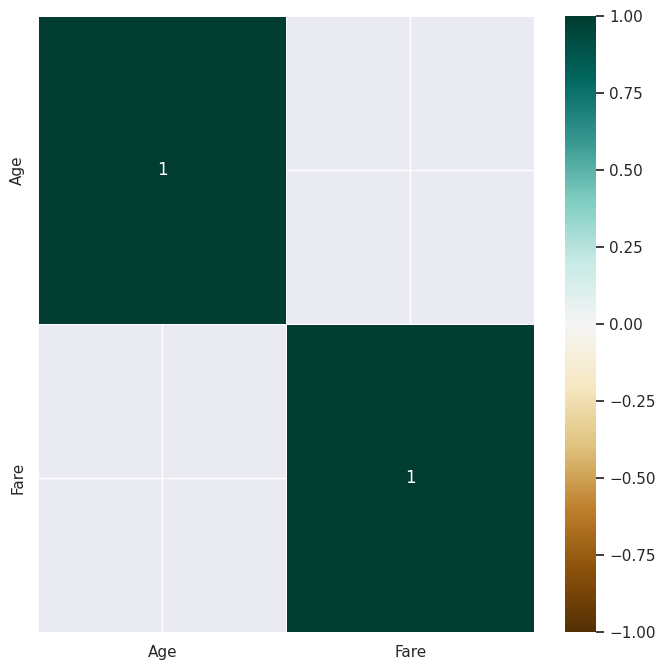

In [54]:
plt.figure(figsize=(8, 8))

TRESHOLD = 0.5

sns.heatmap(
    df[var_quanti].corr()[df[var_quanti].corr().abs() > TRESHOLD],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

### Valeurs manquantes

<Axes: title={'center': 'Valeurs manquantes'}>

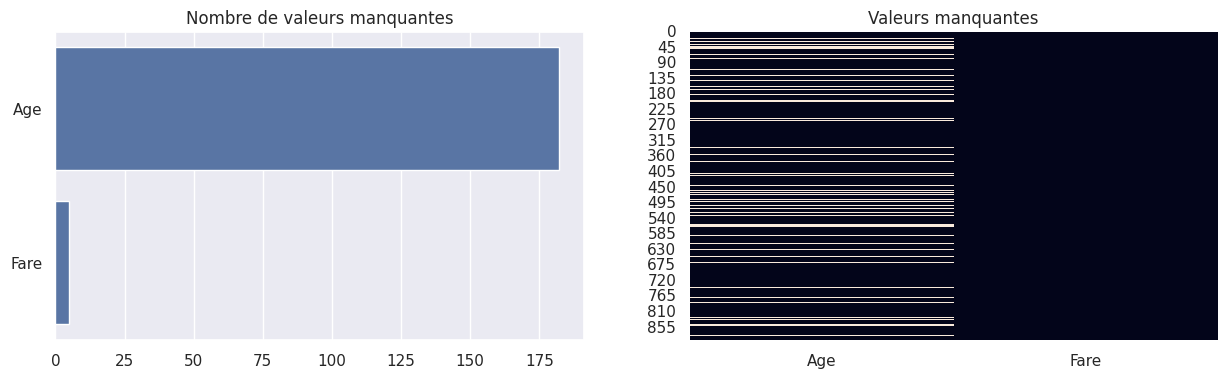

In [120]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
df_na = df[var_quanti].isna().sum()
sns.barplot(x=df_na.values, y=df_na.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_quanti].isna(), cbar=False, ax=ax[1])

In [55]:
df[var_quanti].isna().sum()

Age     177
Fare      0
dtype: int64

## Variables qualitatives

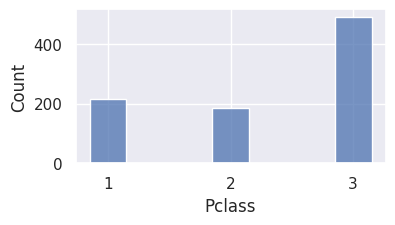

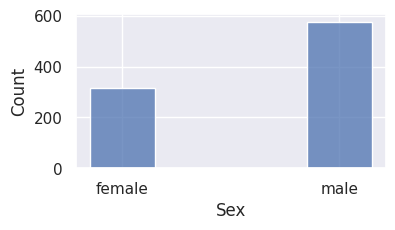

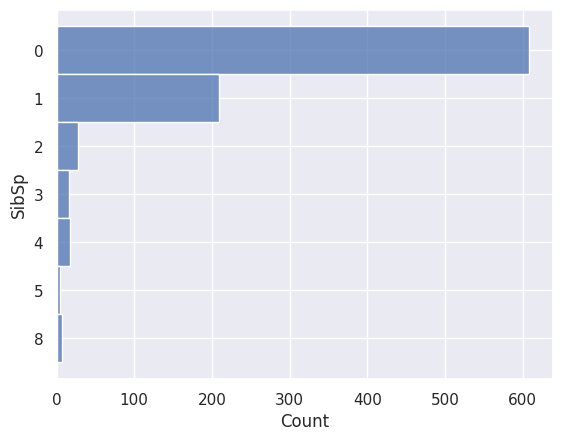

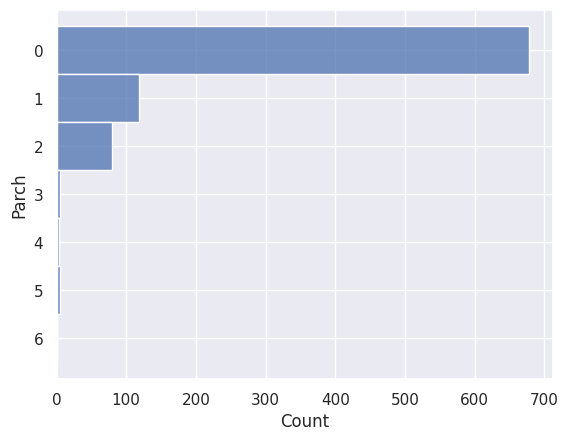

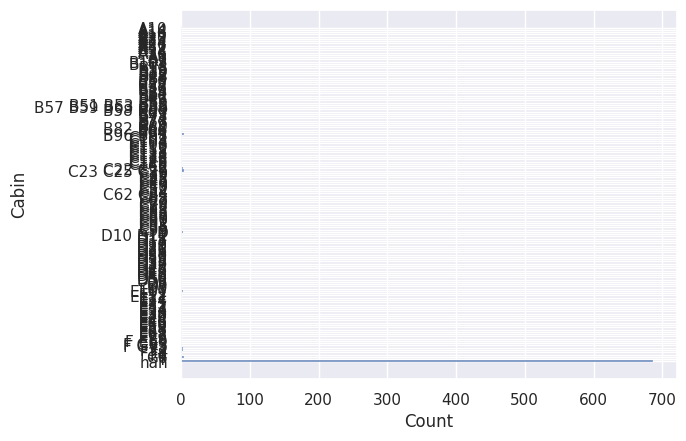

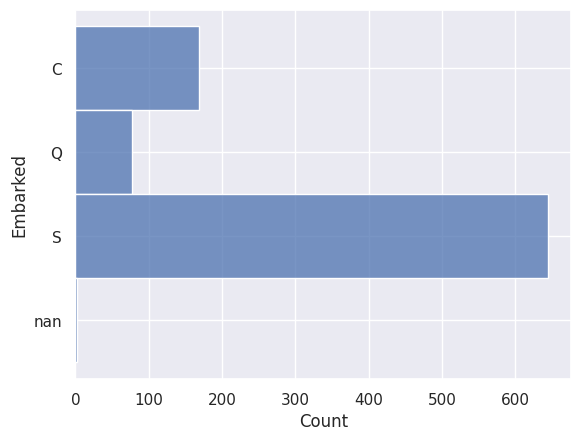

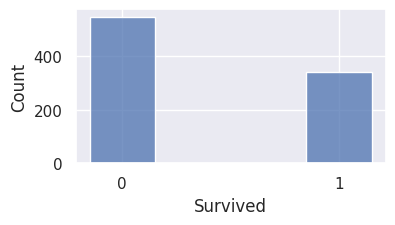

In [60]:
for var in var_quali:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

### Valeurs manquantes

<Axes: title={'center': 'Valeurs manquantes'}>

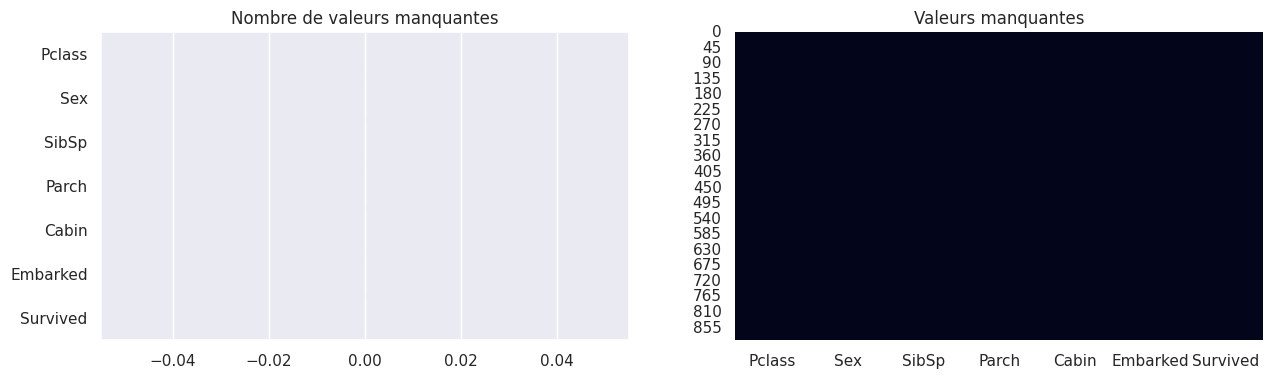

In [121]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
df_na = df[var_quali].isna().sum()
sns.barplot(x=df_na.values, y=df_na.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_quali].isna(), cbar=False, ax=ax[1])

In [59]:
df[var_quali].isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Cabin       0
Embarked    0
Survived    0
dtype: int64

## Variable cible

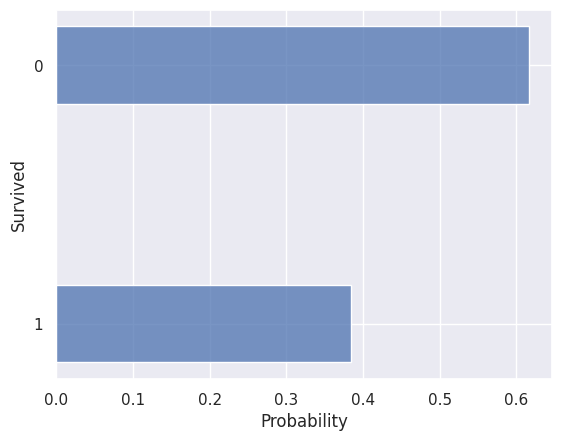

In [16]:
sns.histplot(y=y.astype(str), shrink=0.3, stat="probability")
plt.show()

In [20]:
pd.concat((
    y.value_counts(),
    y.value_counts(normalize=True)
), axis=1)

,Survived,Survived
0,549,0.616162
1,342,0.383838


## Variable cible en fonction des autres variables

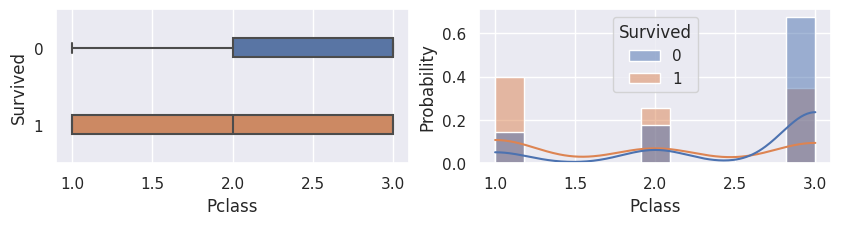

TypeError: Neither the `x` nor `y` variable appears to be numeric.

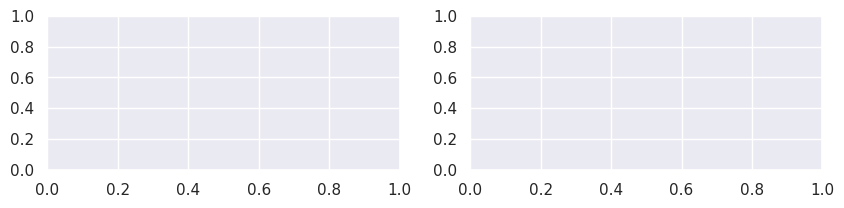

In [21]:
for var in X.columns:
    _, ax = plt.subplots(1, 2, figsize=(10, 2))
    sns.boxplot(x=X[var], y=y.astype(str), width=0.25, ax=ax[0])
    sns.histplot(
        x=X[var],
        kde=True,
        ax=ax[1],
        hue=y.astype(str),
        stat="probability",
        common_norm=False,
    )
    plt.show()

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/data.csv")